<a href="https://colab.research.google.com/github/r22birk/aa-project-birk-chauvel/blob/main/aa_project_birk_chauvel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AA - Project - Phishing detection - Renaud BIRK & Erwan CHAUVEL

## Project & Dataset Description

### Project aims

The goal of this project is to apply machine learning techniques to the [ PhishingWebsites](https://openml.org/d/4534) dataset. We will:
- Perform [data discovery](https://developers.google.com/machine-learning/glossary#data-analysis), [cleaning](https://en.wikipedia.org/wiki/Data_cleansing), [exploration](https://en.wikipedia.org/wiki/Data_mining), [analysis](https://developers.google.com/machine-learning/glossary#data-analysis), and [transformation](https://en.wikipedia.org/wiki/Data_transformation_%28computing%29).
- [Train](https://developers.google.com/machine-learning/glossary#training), [evaluate](https://developers.google.com/machine-learning/glossary#evaluation), and compare [baseline](https://developers.google.com/machine-learning/glossary#baseline) and [ensemble](https://developers.google.com/machine-learning/glossary#ensemble) models.
- Optimize [hyperparameters](https://developers.google.com/machine-learning/glossary#hyperparameter) and analyze the results.
- Provide insights and outline potential improvements.

The final aim is to make it easier to detect [phishing](https://en.wikipedia.org/wiki/Phishing) and determine which [features](https://developers.google.com/machine-learning/glossary#feature) are important to do so.

### Existing solutions

- **Email analysis :** Check headers, links, and attachments for spoofing or suspicious patterns. [See more...](https://right-hand.ai/blog/what-is-phishing-email-analysis/)
- **URL/Domain checks :** Blacklists, domain age, SSL certificates, and heuristic anomalies. [See more...](https://easydmarc.com/tools/phishing-url)
- **Content analysis :** NLP to detect urgency, grammar errors, or mismatched branding. [See more...](https://ieeexplore.ieee.org/document/9515165)
- **ML models :** Classify phishing using features like page structure, redirects, or metadata. [See more...](https://github.com/shreyagopal/Phishing-Website-Detection-by-Machine-Learning-Techniques) (or just continue reading this notebook!)

### Dataset original source

The dataset have been created in 2012 by Rami Mustafa A Mohammad, Lee McCluskey and Fadi Thabtah. It have been pushed to the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/327/phishing+websites).

You can download it [here](https://archive.ics.uci.edu/static/public/327/phishing+websites.zip).

In [90]:
# Run this code cell to import everything
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import arff
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

## Data Load

Run the code cell below to download, extract and store dataset.

In [91]:
# Download and extract the dataset
!wget -O dataset.zip https://archive.ics.uci.edu/static/public/327/phishing+websites.zip
!unzip -o dataset.zip

# Loading data to Python
raw_data = arff.loadarff('Training Dataset.arff')
data = pd.DataFrame(raw_data[0])

# Convert byte strings to regular strings for categorical features
data = data.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

--2025-01-30 14:57:27--  https://archive.ics.uci.edu/static/public/327/phishing+websites.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘dataset.zip’

dataset.zip             [  <=>               ] 987.48K  2.40MB/s    in 0.4s    

2025-01-30 14:57:27 (2.40 MB/s) - ‘dataset.zip’ saved [1011184]

Archive:  dataset.zip
 extracting: .old.arff               
 extracting: Training Dataset.arff   
 extracting: Phishing Websites Features.docx  


<ipython-input-91-7f4679be6e16>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


## Dataset Exploratory Analysis

### Metadata

In [92]:
data.info()
print(f"Number of instances: {data.shape[0]}")
print(f"Number of features: {data.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   having_IP_Address            11055 non-null  object
 1   URL_Length                   11055 non-null  object
 2   Shortining_Service           11055 non-null  object
 3   having_At_Symbol             11055 non-null  object
 4   double_slash_redirecting     11055 non-null  object
 5   Prefix_Suffix                11055 non-null  object
 6   having_Sub_Domain            11055 non-null  object
 7   SSLfinal_State               11055 non-null  object
 8   Domain_registeration_length  11055 non-null  object
 9   Favicon                      11055 non-null  object
 10  port                         11055 non-null  object
 11  HTTPS_token                  11055 non-null  object
 12  Request_URL                  11055 non-null  object
 13  URL_of_Anchor                11

The dataset contains 31 features and 11055 instances.

In [93]:
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


Each value for a feature is one of the following:
- -1 for **LEGITIMATE** (negative)
- 0 for **SUSPICIOUS** (positive)
- 1 for **PHISHING** (strictly positive)

The detailed explaination for each feature is described in the associated file "Phishing Websites Features.docx".

### Nb. nulls or na

In [94]:
print(f"Number of na: {data.isna().sum().sum()}")

Number of na: 0


Additionally, the [Dataset Information](https://archive.ics.uci.edu/dataset/327/phishing+websites) tells us that the dataset has no missing values.

### Features values distributions, scaling & outliers

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

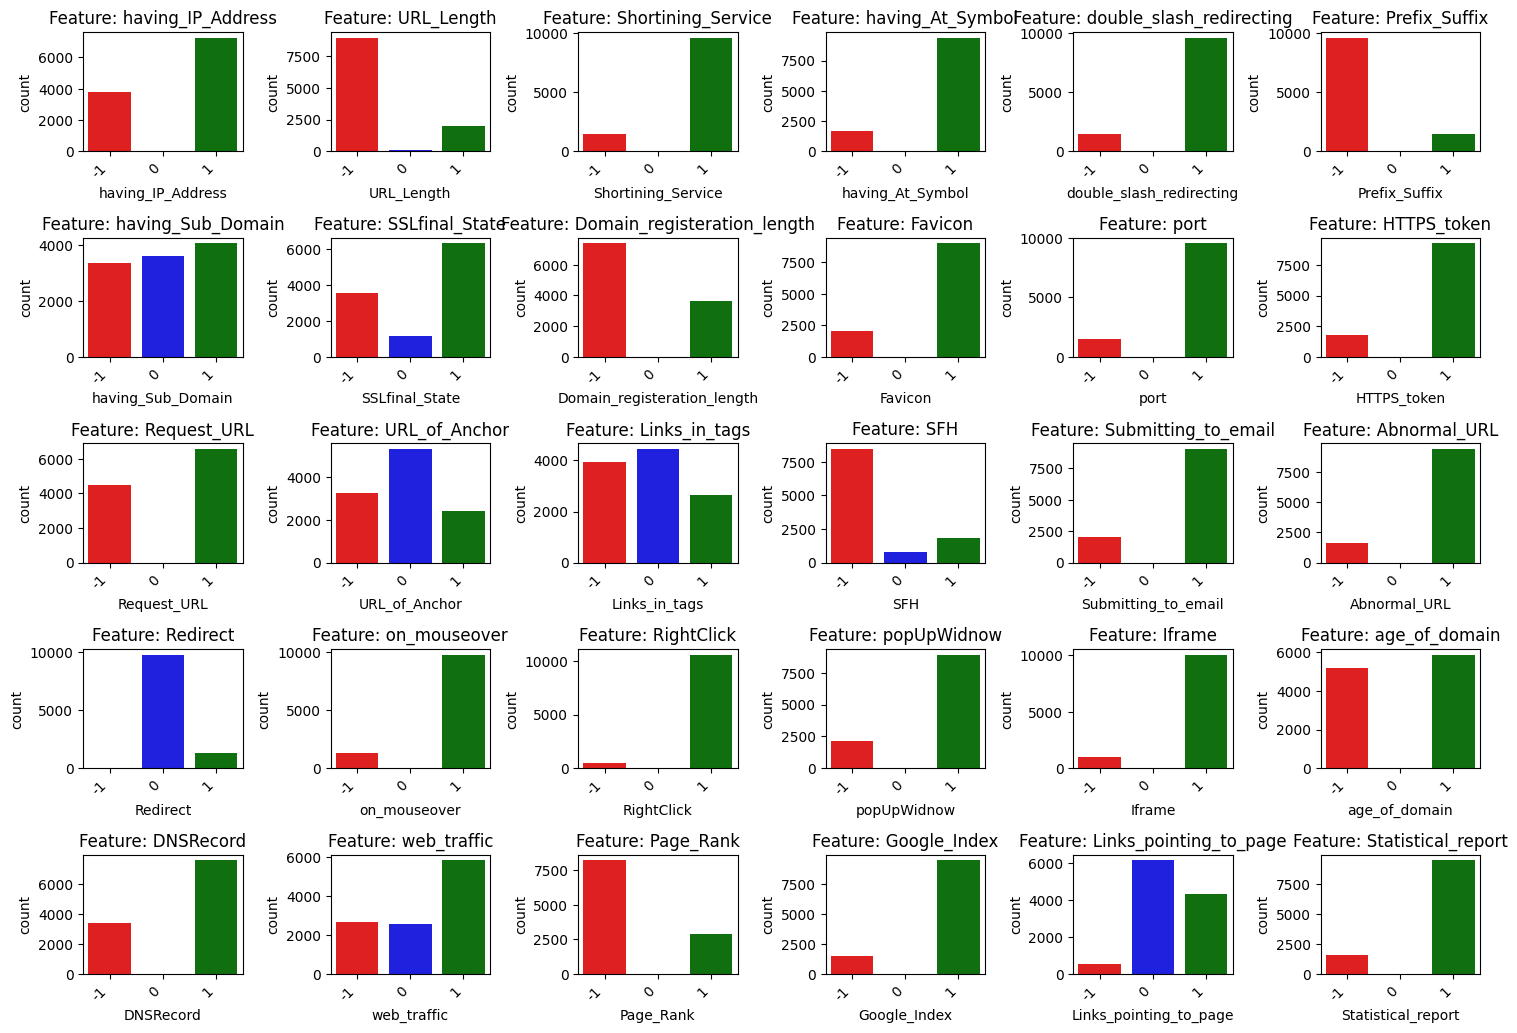

In [95]:
# Splitting regular features and target feature
target = data.iloc[:, -1]
data = data.drop(columns=['Result'])

# Check value distributions for each feature and plot them
plt.figure(figsize=(15, 12))
custom_palette = {'-1': 'red', '0': 'blue', '1': 'green'}
for i, col in enumerate(data.columns):
    plt.subplot(6, 6, i + 1)  # Adjust for grid of plots
    sns.countplot(x=data[col], hue=data[col], palette=custom_palette,
                  order=[-1, 0, 1])
    plt.title(f"Feature: {col}")
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt

The features usually have a legitimate and phishing values. Some features can be suspicious too.
Some feature are unbalanced such as RightClck, popUpWindow or Redirect.
Features with a lot of "Suspicious" values, such as "Redirect" are not really interesting because we it is not really a truth value. Typically, "-1" is negative, "1" is positive and "0" is "we are not sure". That is not really suitable and can be considered as an outlier in our case. Additionnally, it doesn't give any information as the column is mostly filled with "we are not sure" value, we think that this column isn't useful.

### Feature correation, selection

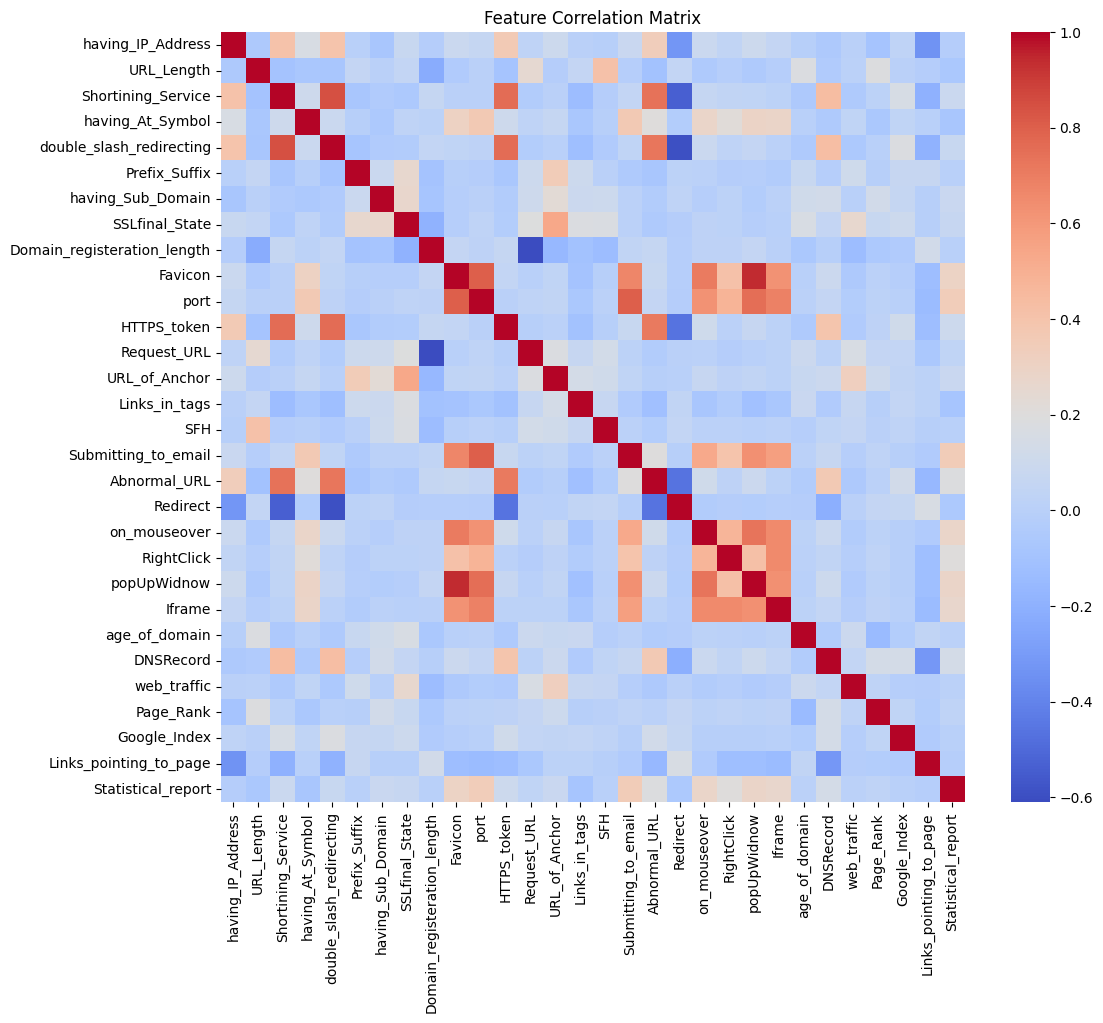

In [96]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

## ML Baseline & Ensemble Models

### Training / Validation / Test Splits

In [97]:
X = data
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Pipelines & Models

### Preprocessing Pipeline

In [98]:
preprocessor = ColumnTransformer([
    # Categorical features
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), X.columns)
])

# Baseline random forest classifier
baseline_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

baseline_pipeline.fit(X_train, y_train)
y_pred = baseline_pipeline.predict(X_test)

### Results

In [99]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9746720940750792
Classification report:
              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       980
           1       0.97      0.98      0.98      1231

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



## Enhanced Models, Hyperparameter Tuning & Analysis

In [100]:
# Ensemble Models & Hyperparameter Tuning
ensemble_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=42))
])

param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(ensemble_pipeline, param_grid, cv=3, scoring='accuracy', verbose=3)
grid_search.fit(X_train, y_train)

# Best model evaluation
y_pred_best = grid_search.best_estimator_.predict(X_test)
print("Best model results")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification report:")
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.916 total time=   1.1s
[CV 2/3] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.914 total time=   0.8s
[CV 3/3] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.922 total time=   0.8s
[CV 1/3] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=0.917 total time=   1.4s
[CV 2/3] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=0.914 total time=   1.4s
[CV 3/3] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=0.923 total time=   1.4s
[CV 1/3] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200;, score=0.923 total time=   2.6s
[CV 2/3] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200;, score=0.921 total time=   3.1s
[CV 3/

### Justification of choices

Hyperparameter tuning is essential to optimize model performance. Instead of using default values, a **GridSearchCV** is employed to systematically explore the best combination of hyperparameters using cross-validation.

#### Selected Hyperparameters

1. **`n_estimators` (nb of boosting stages)**:
Increasing the number of estimators generally improves model performance by allowing more iterations to refine errors. However, too many estimators can lead to overfitting and increased computational cost.

2. **`learning_rate` (step size shrinkage)**:
Lower values make learning more gradual, reducing the risk of overshooting the optimal solution. A trade-off exists between learning rate and `n_estimators`; a low learning rate typically requires more estimators.

3. **`max_depth` (max depth of each tree)**:
A shallow depth (e.g., 3) prevents overfitting, while a deeper tree (e.g., 7) can capture complex patterns but risks overfitting. Intermediate values help balance complexity and generalization.

By leveraging **Gradient Boosting**, **hyperparameter tuning**, and a **well-structured pipeline**, this approach aims to optimize model performance while ensuring robustness and generalization to unseen data.



### Interpretation and analysis of the obtained results

### Model Performance Summary
The trained model achieved an **accuracy of 97.56%** on the test dataset, demonstrating high predictive power. The classification report provides additional insights into the performance across different classes.

### Detailed Performance Metrics
- **[Precision](https://developers.google.com/machine-learning/glossary#precision)**: Measures the percentage of correctly predicted instances for each class. Both classes show high precision, meaning the model makes few false positive errors.
- **[Recall](https://developers.google.com/machine-learning/glossary#recall)**: Indicates how well the model captures instances of each class. Class `-1` has a slightly lower recall (0.96), meaning some instances of this class were misclassified.
- **[F1-score](https://developers.google.com/machine-learning/glossary#f1)**: Balances precision and recall, showing strong performance across both classes.
- **[Support](https://medium.com/@nirajan.acharya777/understanding-precision-recall-f1-score-and-support-in-machine-learning-evaluation-7ec935e8512e)**: Represents the number of true instances for each class in the dataset.

### Class imbalance concern
The dataset has more instances of class `1` (1231) compared to class `-1` (980). However, the model handles this imbalance well, as shown by the balanced precision, recall, and F1-score.

### Conclusion
The model achieves excellent performance, with high precision and recall for both classes. Further validation and refinement can ensure robust real-world applicability.

